In [2]:
from fredapi import Fred
fred = Fred(api_key = '3c333fd92c7d3df79f55af2ee72f13bf')

In [187]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import style
import datetime
from dateutil.relativedelta import relativedelta

In [13]:
gdp = fred.get_series('GDPC1','1960-01-01','2023-03-31')
cons = fred.get_series('PCECC96','1960-01-01','2023-03-31')
inv = fred.get_series('GPDIC1','1960-01-01','2023-03-31')
rec = fred.get_series('USRECQ', '1960-01-01', '2023-03-31')

In [14]:
gdp = np.log(gdp)
cons = np.log(cons)
inv = np.log(inv)

In [15]:
gdp.name = 'gdp'
cons.name = 'cons'
inv.name = 'inv'
rec.name = 'rec'

In [116]:
gdp_df = pd.DataFrame(gdp)
cons_df = pd.DataFrame(cons)
inv_df = pd.DataFrame(inv)
rec_df = pd.DataFrame(rec)

In [117]:
dfs = [gdp_df, cons_df, inv_df,rec_df]
df = pd.concat(dfs, axis = 1)
df['Time'] = df.index
df['Time'] = pd.to_datetime(df['Time'])

# The plot

In [204]:
plt.style.use('mystyle.mplstyle')

def make_a_line():
    ax.plot([0.12, .9],                  # Set width of line
        [1.05, 1.05],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
def make_a_rec():
    ax.add_patch(plt.Rectangle((0.12,1.05),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
    
def make_title(text):
    ax.text(x=0.12, y=0.98, s=text, 
            transform=fig.transFigure, ha='left', 
            fontsize=13, weight='bold', alpha=.8)
    
def make_description(text):
    ax.text(x=0.12, y=0.93, s=text, 
            transform=fig.transFigure, ha='left', 
            fontsize=11, alpha=.8)

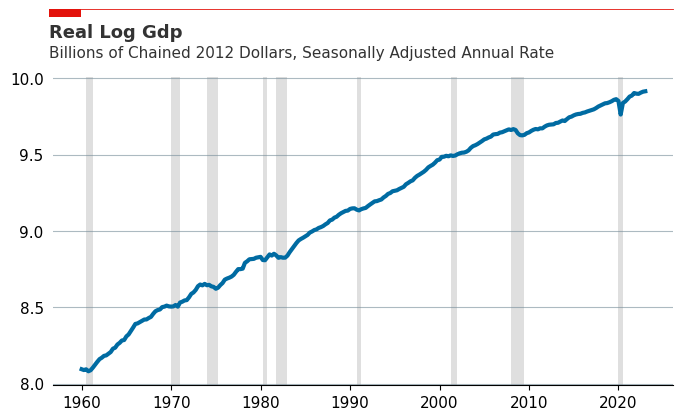

In [232]:
fig, ax = plt.subplots()

ax.plot(df.Time, df.gdp, color='#006BA2', zorder = 2)

ax.yaxis.set_ticks(np.arange(8,10.1,0.5))

make_a_line()
make_a_rec()
make_title('Real Log Gdp')
make_description("Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate")

recession = df.loc[df["rec"] == 1, 'Time']
for day in recession: 
    ax.axvspan(day, day + relativedelta(months =+ 3), color="grey", alpha = 0.25, lw=0, zorder = 1)


plt.savefig('real log.jpg', bbox_inches='tight', dpi = 300)

